# Practica 06: Preparacion de Datos para su Análisis (ETL)

**Aignatura:** Extarcción de Conocimientos en Bases de Datos
<br>Unidad 2: Preparación de Datos
<br>PE: Ingenieria Desarrollo y Gestion de Software

Realizado por: **Jazziel Rodríguez López** - 220627

## 1. Importacion de las librerias y Paquetes a utilizar para el analisis de datos.

In [1]:
## Importacion de librerias
import numpy as np
import pandas as pd 
import time 

##Graficadores
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## 2. Ubicacion del origen de Datos

In [2]:
# muestra directorio
!cd

c:\Users\jazzi\OneDrive\Escritorio\9A-IDGS-220627\9A-IDGS-220627\Practica06


In [ ]:
!dir 

 El volumen de la unidad C es Windows
 El n�mero de serie del volumen es: D047-B76A

 Directorio de c:\Users\jazzi\OneDrive\Escritorio\9A-IDGS-220627\9A-IDGS-220627\Practica06

06/06/2025  12:33 a. m.    <DIR>          .
06/06/2025  12:28 a. m.    <DIR>          ..
06/06/2025  08:42 a. m.           499,622 PT6.ipynb
06/06/2025  12:26 a. m.               805 requirements.txt
06/06/2025  12:04 a. m.         4,054,216 salaries.csv
06/06/2025  12:18 a. m.    <DIR>          venv
               3 archivos      4,554,643 bytes
               3 dirs  168,365,449,216 bytes libres


## 3. Construccion y consulta del Dataframe

In [3]:
df = pd.read_csv('salaries.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73159 entries, 0 to 73158
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73155 non-null  float64
 1   experience_level    73155 non-null  object 
 2   employment_type     73154 non-null  object 
 3   job_title           73152 non-null  object 
 4   salary              73153 non-null  float64
 5   salary_currency     73154 non-null  object 
 6   salary_in_usd       73153 non-null  float64
 7   employee_residence  73154 non-null  object 
 8   remote_ratio        73154 non-null  float64
 9   company_location    73154 non-null  object 
 10  company_size        73148 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.1+ MB


In [5]:
# Print de numero de celdas
df.size

804749

In [6]:
# Print de numero de filas/registros
print(len(df))

73159


In [7]:
df.head() # Muestra las primeras 5 filas del DataFrame

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025.0,SE,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M


In [8]:
df.tail() # Muestra las ultimas 5 filas del DataFrame

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
73154,2020.0,SE,FT,Data Scientist,412000.0,USD,412000.0,US,100.0,US,L
73155,2021.0,MI,FT,Principal Data Scientist,151000.0,USD,151000.0,US,100.0,US,L
73156,2020.0,EN,FT,Data Scientist,105000.0,USD,105000.0,US,100.0,US,S
73157,2020.0,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100.0,US,L
73158,2021.0,SE,FT,Data Scientist,7000000.0,INR,94665.0,IN,50.0,IN,L


# 4. Limpieza de datos previo al análisis
Eliminación de datos duplicados

In [9]:
df_noDuplicated = df.drop_duplicates()
print("Tamaño del DataFrame original:", len(df))
print("Tamaño del DataFrame sin duplicados:", len(df_noDuplicated))
print("Registros/Tuplas eliminados:", len(df) - len(df_noDuplicated))

Tamaño del DataFrame original: 73159
Tamaño del DataFrame sin duplicados: 34030
Registros/Tuplas eliminados: 39129


Importante: La eliminación de duplicados debe realizarse con extremo cuidado sobre todo con datos agrupados o que no tiene una clave privada o atributo identificador, por que existe el riesgo de alterar los resultados y tomar decisiones erradas

Eliminar datos de las filas con un salario vacio

In [10]:
df_clean =df.dropna()
print("Tamaño del DataFrame original:", len(df))
print("Tamaño del DataFrame sin NaN:", len(df_clean))
print("Registros/Tuplas eliminados:", len(df) - len(df_clean))
df.describe()

Tamaño del DataFrame original: 73159
Tamaño del DataFrame sin NaN: 73148
Registros/Tuplas eliminados: 11


,work_year,salary,salary_in_usd,remote_ratio
count,73155.000000,7.315300e+04,73153.000000,73154.000000
mean,2023.831208,1.625473e+05,158007.913633,21.581185
std,0.477531,1.925716e+05,72503.915346,41.021835
min,2020.000000,1.110000e+02,111.000000,0.000000
25%,2024.000000,1.069500e+05,106890.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [11]:
df.isnull() # mapping de la matriz de datos, True si es NaN, False si no es NaN

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
73154,False,False,False,False,False,False,False,False,False,False,False
73155,False,False,False,False,False,False,False,False,False,False,False
73156,False,False,False,False,False,False,False,False,False,False,False
73157,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#eliminar campos con salario vacio
df_clean = df_clean[df_clean['salary'] != '']
print("Tamaño del DataFrame original:", len(df))
print("Tamaño del DataFrame con salarios vacios eliminados:", len(df_clean))
print("Registros/Tuplas eliminados:", len(df) - len(df_clean))

Tamaño del DataFrame original: 73159
Tamaño del DataFrame con salarios vacios eliminados: 73148
Registros/Tuplas eliminados: 11


In [13]:
df.notnull() #Realiza el mapeo con la matriz original colocando valores boleanos de acuerdo a la condicion es nulo 

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
73154,True,True,True,True,True,True,True,True,True,True,True
73155,True,True,True,True,True,True,True,True,True,True,True
73156,True,True,True,True,True,True,True,True,True,True,True
73157,True,True,True,True,True,True,True,True,True,True,True


# 5. Análisis basico del DataFrame(Datos estadísticos generales)
Método que realiza un reporte de los valores estadísticos básicos (Media, Conteo, Mediana, Desviación estandar, Valor máximo, valor mínimo y la concentración de frecuencia 25%, 50% y 75% sobre los datos **Cuantitativos** excluyendo los valores **cualitativos**)

In [14]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,73155.000000,7.315300e+04,73153.000000,73154.000000
mean,2023.831208,1.625473e+05,158007.913633,21.581185
std,0.477531,1.925716e+05,72503.915346,41.021835
min,2020.000000,1.110000e+02,111.000000,0.000000
25%,2024.000000,1.069500e+05,106890.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


## 5. Definir criterios de analisis (Categories)

In [15]:
analysis_cryteria=['work_year','experience_level','employment_type','job_title',
                   'employee_residence', 'company_location', 'company_size']

## 6. Graficamos algo Basico

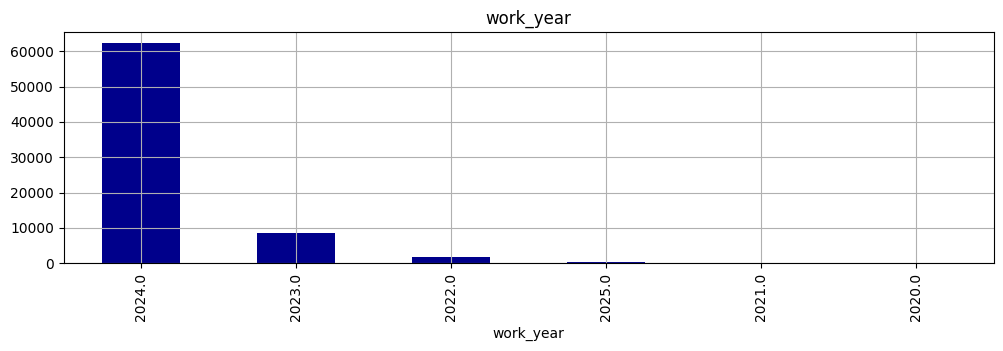

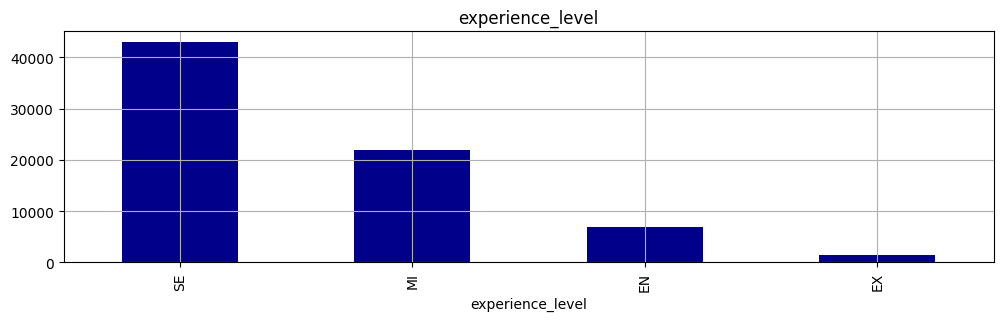

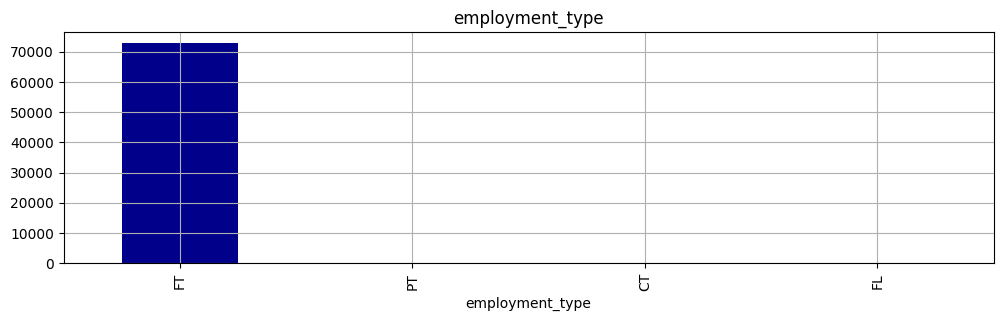

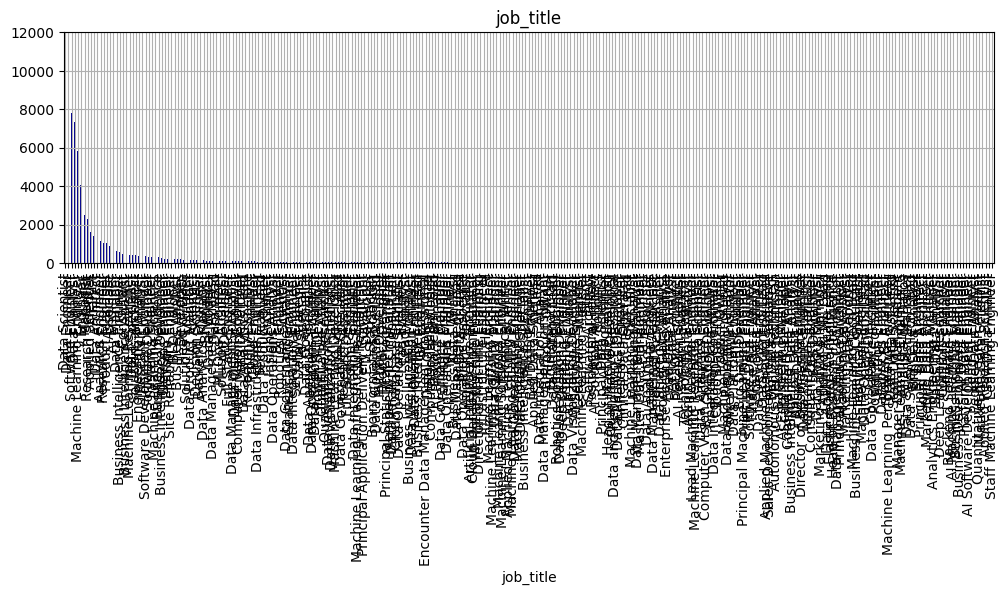

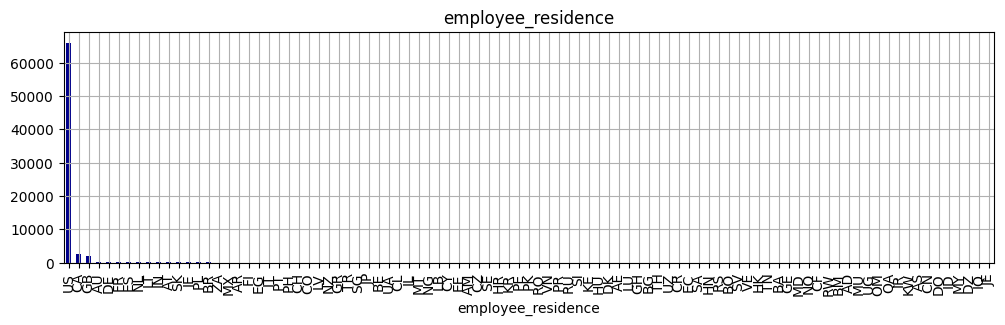

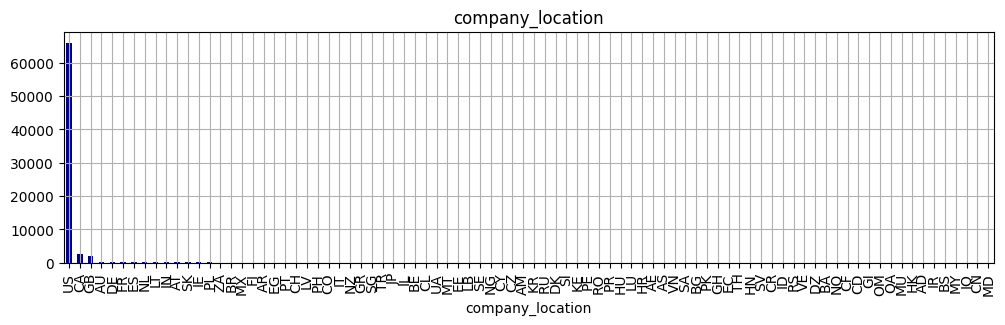

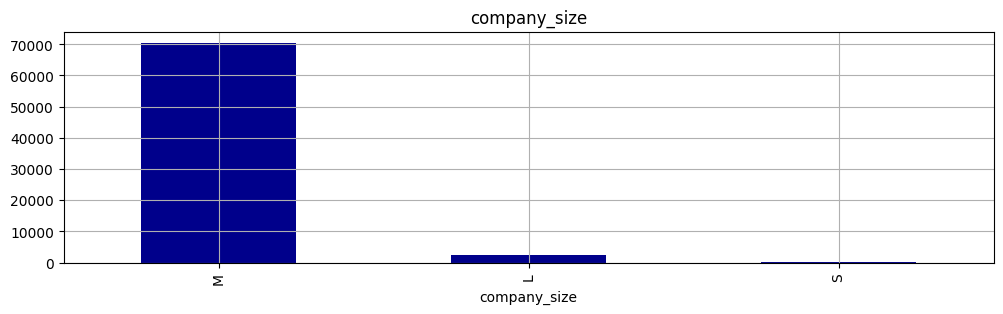

In [16]:
def_color = 'darkblue'
for f in analysis_cryteria:
    plt.figure(figsize=(12,3))
    df[f].value_counts().plot(kind='bar', color=def_color)
    plt.title(f)
    plt.grid()
    plt.show()
## 6. Limpiamos los datos para enfocarnos en los datos recolectados desde 2023, empleados de tiempo completo(Full time) en EU/US

In [17]:
# Creamos un subconjunto de la muetsra original

df_after2023 = df[(df.work_year>=2023)&(df.employment_type=='FT')&(df.company_location=='US')]
df_mex = df[(df.company_location=='MX')]

Revisamos los metadatos de la nueva entrada

In [18]:
df_after2023.info()
df_mex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64334 entries, 0 to 71263
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           64334 non-null  float64
 1   experience_level    64334 non-null  object 
 2   employment_type     64334 non-null  object 
 3   job_title           64332 non-null  object 
 4   salary              64333 non-null  float64
 5   salary_currency     64334 non-null  object 
 6   salary_in_usd       64333 non-null  float64
 7   employee_residence  64334 non-null  object 
 8   remote_ratio        64334 non-null  float64
 9   company_location    64334 non-null  object 
 10  company_size        64328 non-null  object 
dtypes: float64(4), object(7)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 7853 to 73008
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   

In [19]:
df_after2023.size

707674

In [20]:
print(len(df_after2023))
print(len(df_mex))

64334
53


In [21]:
analysis_salary=['salary_in_usd']

C:\Users\jazzi\AppData\Local\Temp\ipykernel_14432\3280321274.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after2023['salary_group'] = pd.cut(df_after2023[f], bins=bins,labels=labels, include_lowest=True)


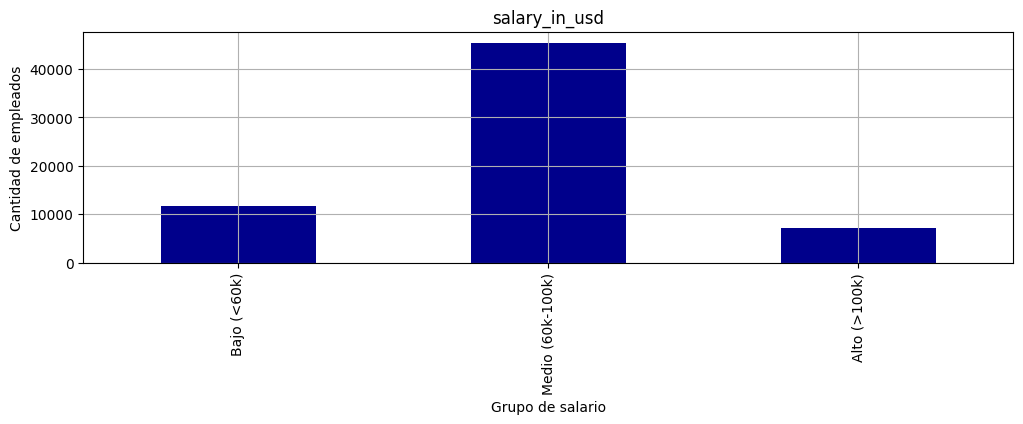

In [22]:
analysis_salary=['salary_in_usd']
def_color = 'darkblue'
for f in analysis_salary:
    plt.figure(figsize=(12,3))
    bins = [0, 100000, 250000, df_after2023[f].max()]
    labels = ['Bajo (<60k)', 'Medio (60k-100k)', 'Alto (>100k)']
    df_after2023['salary_group'] = pd.cut(df_after2023[f], bins=bins,labels=labels, include_lowest=True)
    df_after2023['salary_group'].value_counts().sort_index().plot(kind='bar', color=def_color)
    plt.title(f)
    plt.xlabel("Grupo de salario")
    plt.ylabel("Cantidad de empleados")
    plt.grid()
    plt.show()

Reemplaza los valores nulos con un valor especifico

In [24]:
df_valoresNulosSustituidos = df.fillna(value='N/A') # java es nan y python es none

Que pasa si repetimoz un describe

In [25]:
df_valoresNulosSustituidos.describe()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,73159.0,73159,73159,73159,73159.0,73159,73159.0,73159,73159.0,73159,73159
unique,7.0,5,5,290,7097.0,26,7704.0,94,4.0,87,4
top,2024.0,SE,FT,Data Scientist,160000.0,USD,160000.0,US,0.0,US,M
freq,62235.0,42926,72814,11443,1437.0,69424,1426.0,65988,57226.0,66041,70536


Sustituir por un valor especifico 

In [26]:
df_clean = df.fillna({'salary':0.0, 'salary_in_usd':0.0})

Comprobamos la sustitucion

In [28]:
df_clean

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025.0,SE,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
73154,2020.0,SE,FT,Data Scientist,412000.0,USD,412000.0,US,100.0,US,L
73155,2021.0,MI,FT,Principal Data Scientist,151000.0,USD,151000.0,US,100.0,US,L
73156,2020.0,EN,FT,Data Scientist,105000.0,USD,105000.0,US,100.0,US,S
73157,2020.0,EN,CT,Business Data Analyst,100000.0,USD,100000.0,US,100.0,US,L


Limpieza de datos con valores erroneos
Para ejemplificar este tipo de limpieza de datos, tomaremos en consideración la columna: 'experience_level' cuyos valores registrados son 

In [29]:
df['experience_level'].unique()

array(['SE', 'EN', 'MI', 'EX', nan], dtype=object)

Totales por categorias

In [30]:
df['experience_level'].value_counts(dropna=False)

experience_level
SE     42926
MI     21858
EN      6877
EX      1494
NaN        4
Name: count, dtype: int64

esto hiba arriba lo  de abajo ya es lo bueno 


Graficar el total de ganancias (0 a 100k, 101 a 250k, 250k+)

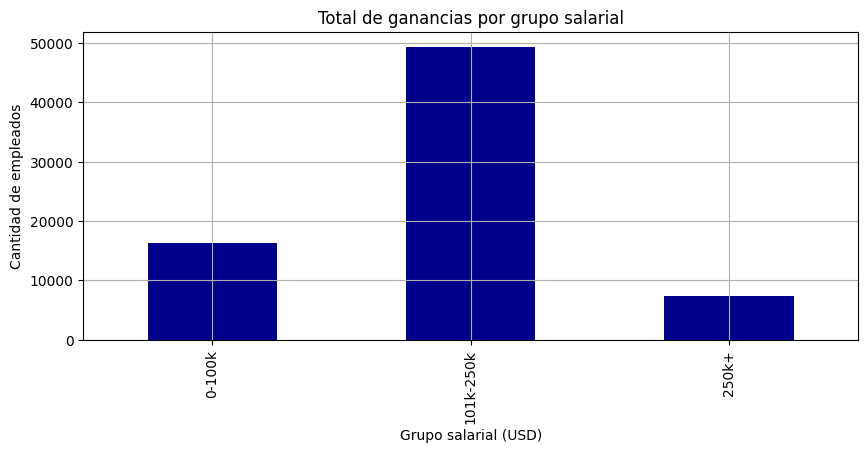

In [31]:
plt.figure(figsize=(10,4))
df['salary_in_usd'] = pd.to_numeric(df['salary_in_usd'], errors='coerce')
bins = [0, 100000, 250000, df['salary_in_usd'].max()]
labels = ['0-100k', '101k-250k', '250k+']
df['salary_group'] = pd.cut(df['salary_in_usd'], bins=bins, labels=labels, include_lowest=True)
df['salary_group'].value_counts().sort_index().plot(kind='bar', color=def_color)
plt.title('Total de ganancias por grupo salarial')
plt.xlabel('Grupo salarial (USD)')
plt.ylabel('Cantidad de empleados')
plt.grid()
plt.show()

5. Cargar datos
6. importacion de datos de base de datos sql (mysql)
7. exportar datos en una tabla tempral de (sql)
8. importar datos de una API -get esto es ejercicio 2
9. limpiar datos
10. transformacion de datos
11. exportar datos
12. exxtra con nosql
13. importacion de datos de una bd de mongo
14. limpiar datax   